In [1]:
import pennylane as qml
from pennylane import numpy as np
from qiskit.providers.fake_provider import *
from pennylane.transforms import mitigate_with_zne, richardson_extrapolate, fold_global

def ansatz(params, wires):
    qml.RY(params[0], wires=wires)
def CA():
    # qml.CZ(wires=(1, 0))
    pass
def U_b():
    qml.Hadamard(wires=0)

dev = qml.device("default.qubit", wires = 2)

def circuit(params, part=None, j=-1):
    qml.Hadamard(1)
    if part == "Im":
        qml.PhaseShift(-np.pi/2, wires=1)

    ansatz(params, wires=0)
    # CA()
    U_b()

    if j != -1:
        qml.CZ(wires=[1, j])

    U_b()
    # CA()

    qml.Hadamard(wires=1)

    return qml.expval(qml.PauliZ(wires=1))

circuit_noiseless = qml.QNode(circuit, dev)


def mu(params, j):
    mu_real = circuit_noiseless(params, part="Re", j=j)
    mu_imag = circuit_noiseless(params, part="Im", j=j)
    
    return mu_real + 1.0j * mu_imag
def cost_fun(params):
    mu_sum = abs(mu(params, 0))
    norm = abs(mu(params, -1))

    res = 0.5 - 0.5 * mu_sum / (1 * norm)

    return res

Step 299       Cost_L = 0.0000000


/var/folders/46/x_y_zr5s2rj1v37fwfjmjh9r0000gn/T/ipykernel_22724/2136831664.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


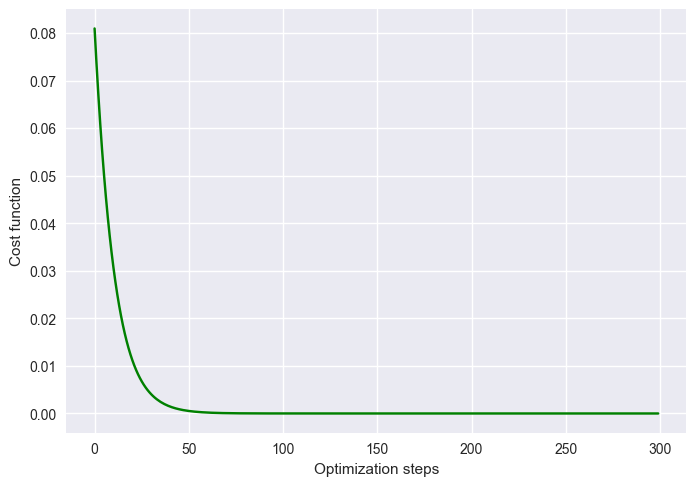

In [5]:
lr = 0.1
opt = qml.GradientDescentOptimizer(lr)
from IPython.display import clear_output
w = np.random.randn(2, 
requires_grad=True)
cost_history = []

for it in range(300):
    w, cost = opt.step_and_cost(cost_fun, w)
    clear_output(wait=True)
    print("Step {:3d}       Cost_L = {:9.7f}".format(it, cost), flush=True)
    cost_history.append(cost)

import matplotlib.pyplot as plt
plt.style.use("seaborn")
# plt.plot(np.log(cost_history), "g")
plt.plot(cost_history, "g")
plt.ylabel("Cost function")
plt.xlabel("Optimization steps")
plt.show()

In [3]:
qml.about()

Name: PennyLane
Version: 0.33.1
Summary: PennyLane is a Python quantum machine learning library by Xanadu Inc.
Home-page: https://github.com/PennyLaneAI/pennylane
Author: 
Author-email: 
License: Apache License 2.0
Location: /Users/bigsad/Downloads/Algorithm-Research/Student-Hub/Indy-Ng/.venv/lib/python3.11/site-packages
Requires: appdirs, autograd, autoray, cachetools, networkx, numpy, pennylane-lightning, requests, rustworkx, scipy, semantic-version, toml, typing-extensions
Required-by: PennyLane-Lightning, PennyLane-qiskit

Platform info:           macOS-12.6-x86_64-i386-64bit
Python version:          3.11.6
Numpy version:           1.23.5
Scipy version:           1.10.1
Installed devices:
- default.gaussian (PennyLane-0.33.1)
- default.mixed (PennyLane-0.33.1)
- default.qubit (PennyLane-0.33.1)
- default.qubit.autograd (PennyLane-0.33.1)
- default.qubit.jax (PennyLane-0.33.1)
- default.qubit.legacy (PennyLane-0.33.1)
- default.qubit.tf (PennyLane-0.33.1)
- default.qubit.torch (Penn

In [4]:
dev3 = qml.device("default.qubit", wires = 2)
dev_noisy = qml.device("qiskit.remote", wires = 2, backend=configured_backend())

def ansatz(params, wires):
    qml.RY(params[0], wires=wires)

def U_b(wires):
    qml.Hadamard(wires=wires)

def test_hadamard(params, part="Re", j=-1):
    qml.Hadamard(wires=1)

    # qml.RY(params[0], 0)
    ansatz(params, wires=0)

    if part == "Im":
        qml.PhaseShift(-np.pi/2, wires=1)

    # qml.Hadamard(wires=0)
    U_b(wires=0)

    if j != -1:
        qml.CZ(wires=(1,j))


    # qml.Hadamard(wires=0)
    U_b(wires=0)

    qml.Hadamard(wires=1)

    # return qml.state()
    return qml.expval(qml.PauliZ(1))

NameError: name 'configured_backend' is not defined

In [ ]:
test_hadamard_noiseless = qml.QNode(test_hadamard, dev3)
test_hadamard_noisy = qml.QNode(test_hadamard, dev_noisy)
test_hadamard_mitiq = mitigate_with_zne(test_hadamard, [1, 2, 3], fold_global, richardson_extrapolate)

In [ ]:
# mu
print(test_hadamard_noiseless([np.pi/2], part="Re", j=0))
print(test_hadamard_noiseless([np.pi/2], part="Im", j=0))

#beta 
print(test_hadamard_noiseless([np.pi/2], part="Re", j=-1))
print(test_hadamard_noiseless([np.pi/2], part="Im", j=-1))

0.9999999999999992
0.0
0.9999999999999993
0.0


#### Try now with noise

In [ ]:
# mu
print(test_hadamard_noisy([np.pi/2], part="Re", j=0))
print(test_hadamard_noisy([np.pi/2], part="Im", j=0))
#beta 
print(test_hadamard_noisy([np.pi/2], part="Re", j=-1))
print(test_hadamard_noisy([np.pi/2], part="Im", j=-1))

0.9609375
0.05859375
0.978515625
0.013671875


#### With Mitiq

In [ ]:
# mu
print(test_hadamard_mitiq([np.pi/2], part="Re", j=0))
print(test_hadamard_mitiq([np.pi/2], part="Im", j=0))
#beta 
print(test_hadamard_mitiq([np.pi/2], part="Re", j=-1))
print(test_hadamard_mitiq([np.pi/2], part="Im", j=-1))

TransformError: Impossible to dispatch your transform on quantum function, because more than one tape is returned